In [1]:
from datetime import datetime as dt

import twitterscraper as ts
import pandas as pd
import matplotlib.pyplot as plt
import re

INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}


In [2]:
# Scrape data from twitter bot
user = "PHCovid19"
tweets = ts.query.query_tweets_from_user(user)
df = pd.DataFrame(t.__dict__ for t in tweets)

INFO: Scraping tweets from https://twitter.com/PHCovid19
INFO: Using proxy 173.217.255.36:33351
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1252148025268547584&reset_error_state=false
INFO: Using proxy 167.71.246.71:8080
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1246002054755020800&reset_error_state=false
INFO: Using proxy 178.219.37.70:8080
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1242378520111833091&reset_error_state=false
INFO: Using proxy 213.96.26.70:53018
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1239841954407395329&reset_error_state=false
INFO: Using proxy

In [3]:
# Filter statuses
tag = "text"
statuses = [s for s in df[tag] if s.startswith("Status")]

In [15]:
dataset = []
for s in statuses:
    entries = re.split(r"\n+", s)

    # Indices Mapping.
    # 0 - date, 1 - cases, 2 - deaths, 3 - recovered, 4 - 
    date = dt.strptime(entries[0][13:len(entries[0]) - 1], "%d %B %Y, %I:%M %p")
    cases = [int(s) for s in entries[1].split() if s.isdigit()][0]
    deaths = [int(s) for s in entries[2].split() if s.isdigit()][0]
    recoveries = [int(s) for s in entries[3].split() if s.isdigit()][0]
    active_cases = cases - recoveries - deaths
    
    # Append to data set
    dataset.append({"date": date, "cases": cases, "deaths": deaths, "recoveries": recoveries, "active_cases": active_cases})

In [16]:
size = len(dataset)
for i in range(size):
    data = dataset[i]
    if i + 1 < size:
        prev_data = dataset[i + 1]
        
        cases_diff = data["cases"] - prev_data["cases"]
        deaths_diff = data["deaths"] - prev_data["deaths"]
        recoveries_diff = data["recoveries"] - prev_data["recoveries"]
        
        data["cases_diff"] = cases_diff
        data["deaths_diff"] = deaths_diff
        data["recoveries_diff"] = recoveries_diff
        
covid_df = pd.DataFrame(dataset)
covid_df["cases_diff"] = covid_df["cases_diff"].fillna(0).astype(int)
covid_df["deaths_diff"] = covid_df["deaths_diff"].fillna(0).astype(int)
covid_df["recoveries_diff"] = covid_df["recoveries_diff"].fillna(0).astype(int)

In [17]:
covid_df

,date,cases,deaths,recoveries,active_cases,cases_diff,deaths_diff,recoveries_diff
0,2020-05-08 17:26:00,10463,696,1743,8024,120,11,125
1,2020-05-07 16:29:00,10343,685,1618,8040,339,27,112
2,2020-05-06 16:14:00,10004,658,1506,7840,0,0,0
3,2020-05-06 16:14:00,10004,658,1506,7840,320,21,98
4,2020-05-05 16:12:00,9684,637,1408,7639,199,14,93
...,...,...,...,...,...,...,...,...
70,2020-03-18 16:39:00,202,17,7,178,9,3,0
71,2020-03-18 15:14:00,193,14,7,172,6,0,3
72,2020-03-18 13:00:00,187,14,4,169,0,0,0
73,2020-03-18 00:34:00,187,14,4,169,0,2,3


In [7]:
# Plot annotation Labeling function
def label(xs, ys, step, color, xo, yo):
    zippy = list(zip(xs, ys))
    for i in range(0, len(zippy), step):
        x, y = zippy[i]
        if y == 0:
            continue
        plt.annotate(y, (x, y), textcoords="offset points", color=color, xytext=(xo, yo), ha="center")

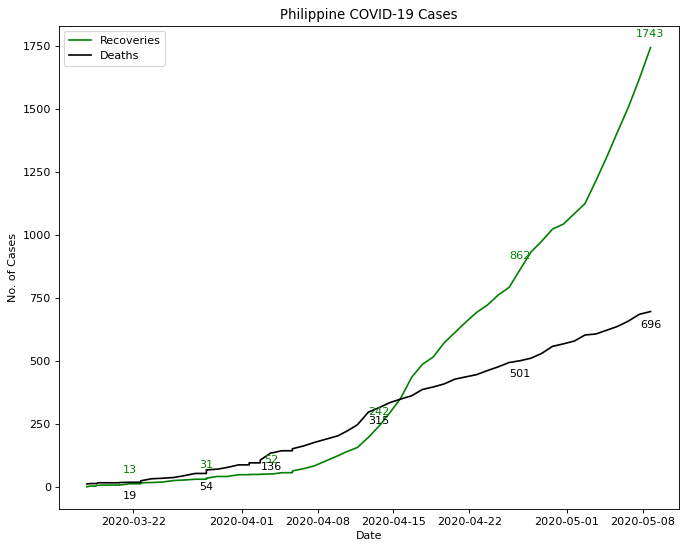

In [8]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["recoveries"]
step = 13

# Plot recoveries
label(xs, ys, step, "green", 0, 10)
plt.plot(xs, ys, color="green", label="Recoveries")

# Plot deaths
ys = covid_df["deaths"]
label(xs, ys, step, "black", 0, -15)
plt.plot(xs, ys, color="black", label="Deaths")

plt.legend(loc="upper left")
plt.show()

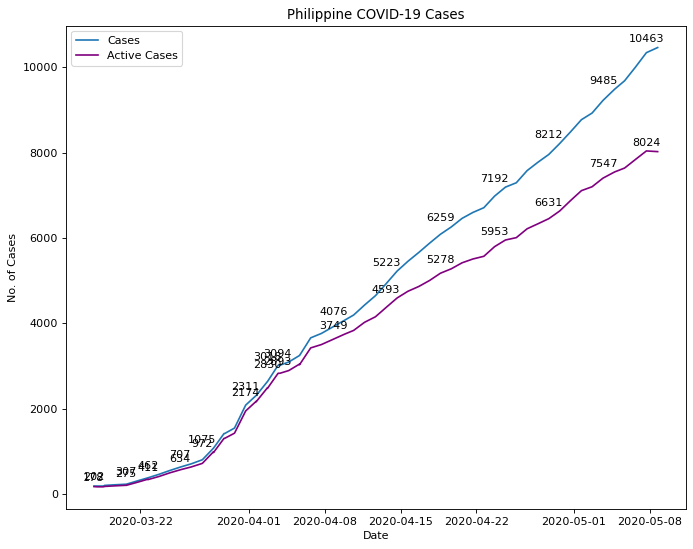

In [28]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["cases"]

# Plot cases
label(xs, ys, 5, "black", -10, 5)
plt.plot(xs, ys, label="Cases")
ys = covid_df["active_cases"]
label(xs, ys, 5, "black", -10, 5)
plt.plot(xs, ys, label="Active Cases", color="purple")
plt.legend(loc="upper left")
plt.show()

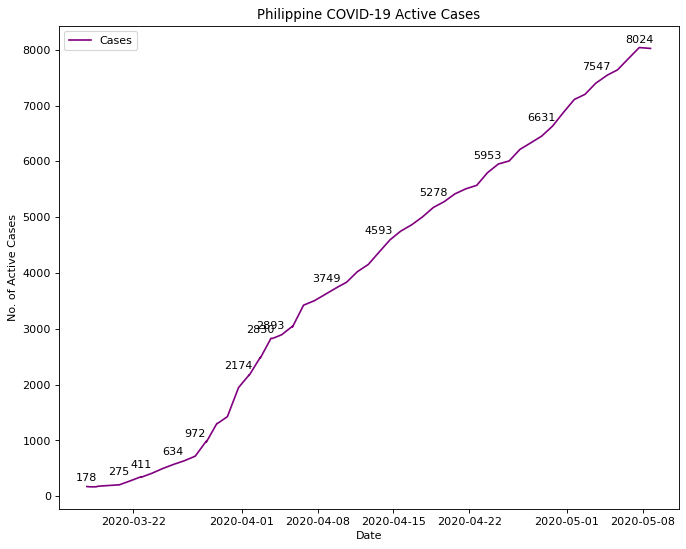

In [27]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Active Cases")
plt.xlabel("Date")
plt.ylabel("No. of Active Cases")

xs = covid_df["date"]
ys = covid_df["active_cases"]

# Plot cases
label(xs, ys, 5, "black", -10, 5)
plt.plot(xs, ys, label="Cases", color="purple")

plt.show()

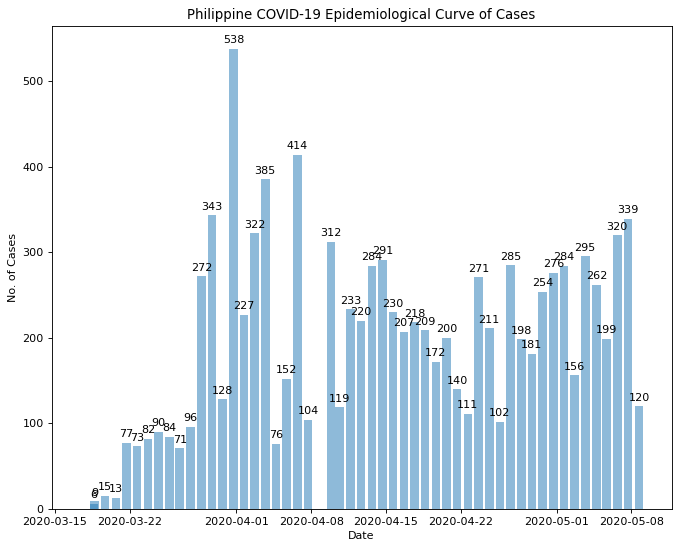

In [10]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Epidemiological Curve of Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["cases_diff"]

label(xs, ys, 1, "black", 0, 5)
plt.bar(xs, ys, align='center', alpha=0.5)

plt.show()

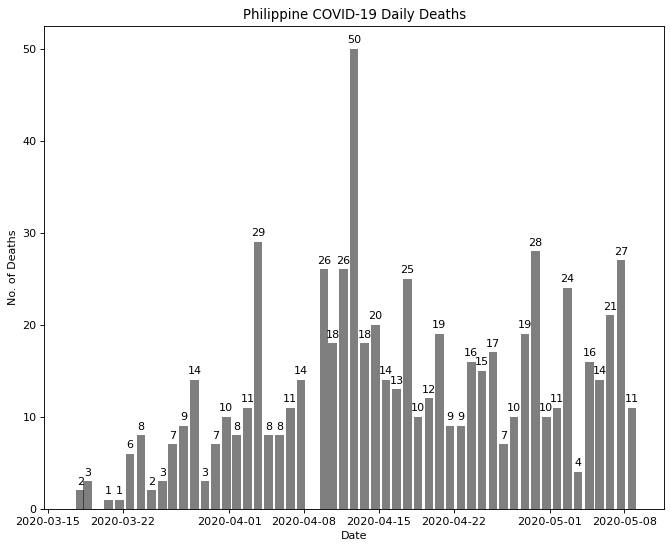

In [11]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Daily Deaths")
plt.xlabel("Date")
plt.ylabel("No. of Deaths")

xs = covid_df["date"]
ys = covid_df["deaths_diff"]

label(xs, ys, 1, "black", 0, 5)
plt.bar(xs, ys, align='center', alpha=0.5, color="k")

plt.show()

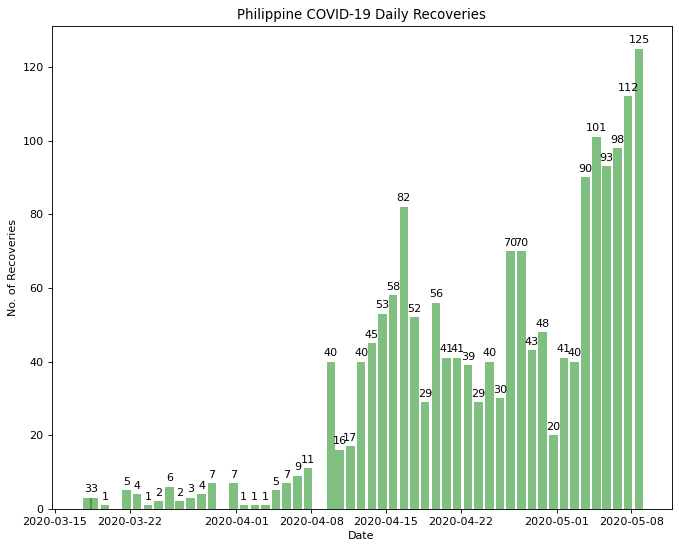

In [12]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Daily Recoveries")
plt.xlabel("Date")
plt.ylabel("No. of Recoveries")

xs = covid_df["date"]
ys = covid_df["recoveries_diff"]

label(xs, ys, 1, "black", 0, 5)
plt.bar(xs, ys, align='center', alpha=0.5, color="g")

plt.show()